In [90]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq

with open('eeg_img_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)
    


In [91]:
sample = dataset[779]

In [92]:
eeg_data = sample['eeg_data']
img = sample['image']
info = sample['info']

In [93]:
eeg_data_pz = np.array(eeg_data['Pz'])
eeg_data_pz.shape

(384,)

In [94]:
info

{'synset_id': 'n02088238',
 'image_number': '13524',
 'session_number': '1',
 'global_session_number': '739'}

In [95]:
channel_names = ['AF3', 'AF4', 'T7', 'T8', 'Pz']

In [96]:
def convert_and_repair(a):
    channel = np.array(eeg_data[a])
    channel = channel.T
    return channel

In [97]:

af3 = convert_and_repair(channel_names[0])
af3

array([4295.8974359 , 4301.53846154, 4309.74358974, 4302.56410256,
       4291.79487179, 4291.79487179, 4296.41025641, 4292.82051282,
       4286.66666667, 4278.46153846, 4277.43589744, 4287.69230769,
       4291.79487179, 4285.64102564, 4277.43589744, 4277.94871795,
       4285.12820513, 4285.64102564, 4277.43589744, 4272.30769231,
       4276.41025641, 4280.        , 4284.1025641 , 4283.07692308,
       4280.51282051, 4287.17948718, 4287.17948718, 4278.97435897,
       4280.        , 4284.1025641 , 4277.43589744, 4272.82051282,
       4280.51282051, 4283.58974359, 4275.38461538, 4276.41025641,
       4286.66666667, 4282.56410256, 4272.30769231, 4272.82051282,
       4275.8974359 , 4274.87179487, 4275.8974359 , 4276.92307692,
       4276.41025641, 4280.51282051, 4276.92307692, 4271.79487179,
       4283.07692308, 4291.28205128, 4278.46153846, 4269.23076923,
       4279.48717949, 4280.        , 4263.58974359, 4257.43589744,
       4266.66666667, 4271.79487179, 4269.23076923, 4278.97435

In [98]:
eeg_each_channel = []


for i in channel_names:
    eeg_each_channel.append(convert_and_repair(i))

len(eeg_each_channel)

5

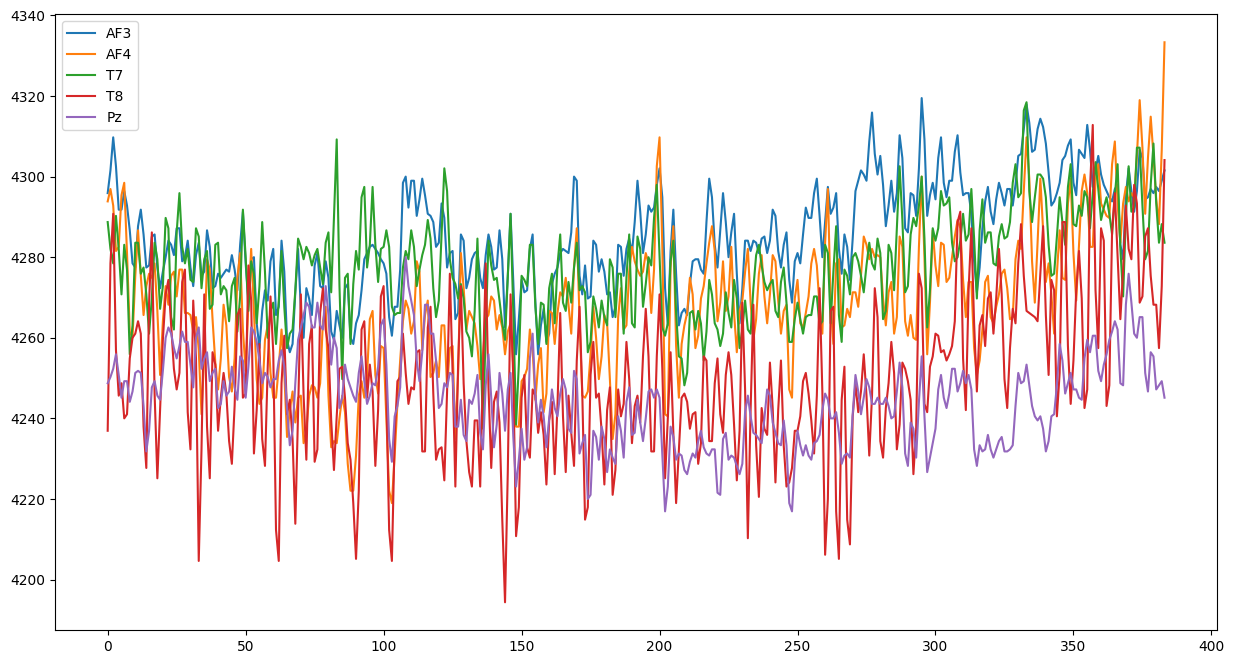

In [99]:
plt.figure(figsize=(15, 8))
plt.plot([i for i in range(len(eeg_each_channel[0]))], eeg_each_channel[0], label='AF3')
plt.plot([i for i in range(len(eeg_each_channel[1]))], eeg_each_channel[1], label='AF4')
plt.plot([i for i in range(len(eeg_each_channel[2]))], eeg_each_channel[2], label='T7')
plt.plot([i for i in range(len(eeg_each_channel[3]))], eeg_each_channel[3], label='T8')
plt.plot([i for i in range(len(eeg_each_channel[4]))], eeg_each_channel[4], label='Pz')
plt.legend()
plt.show()

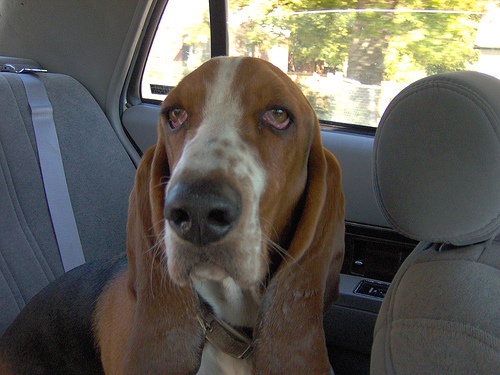

In [100]:
img

In [101]:
def to_fft(data, num):
    x_data = data[num]
    y_data = fft(x_data)
    return y_data

/home/marcos/Desktop/image_net_data_exploration/img2brain/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/marcos/Desktop/image_net_data_exploration/img2brain/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


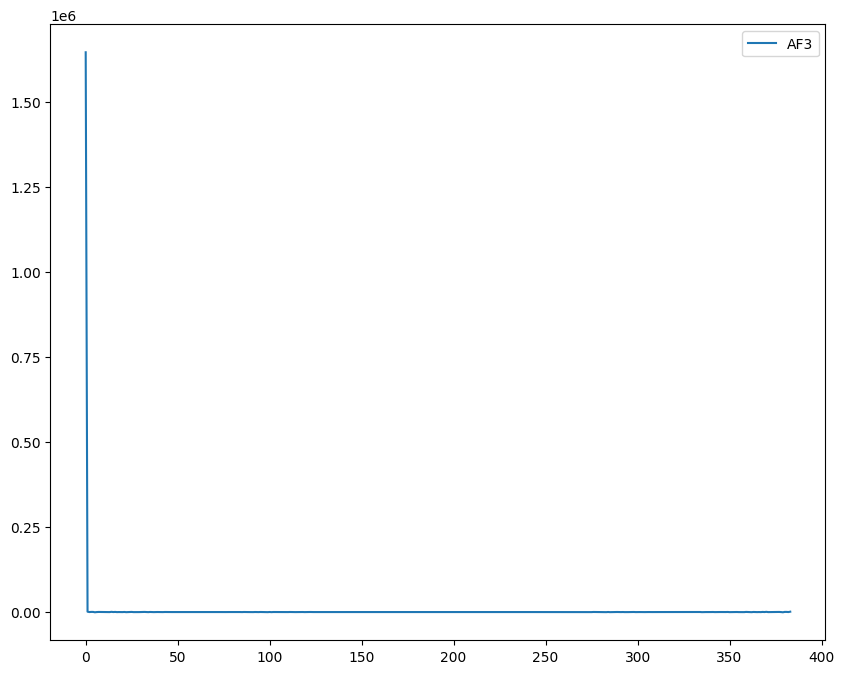

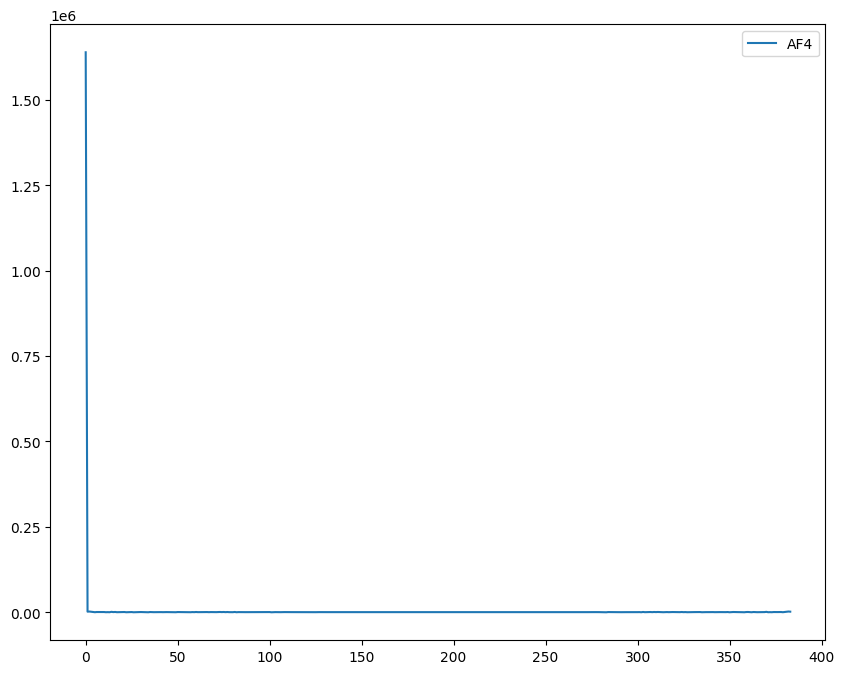

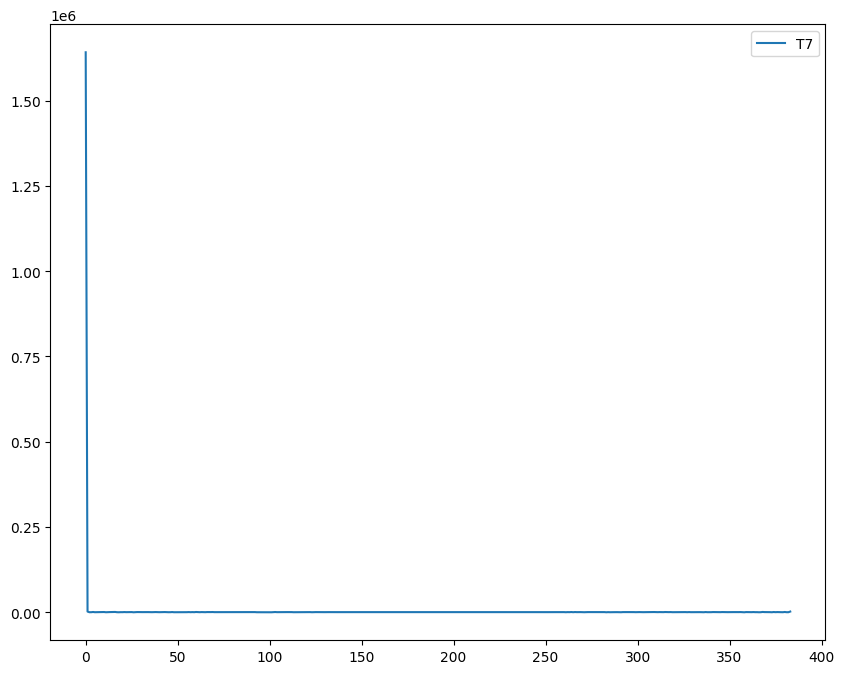

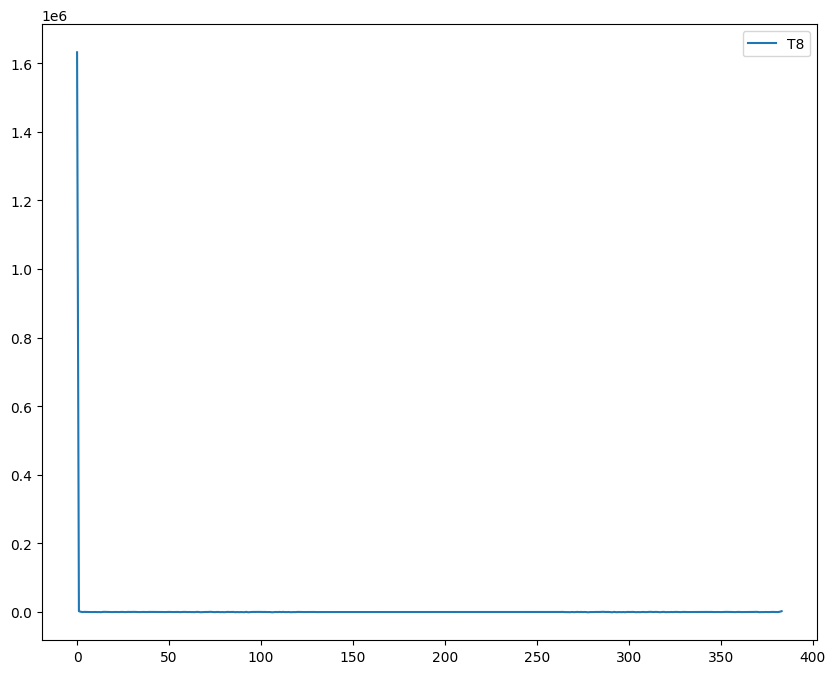

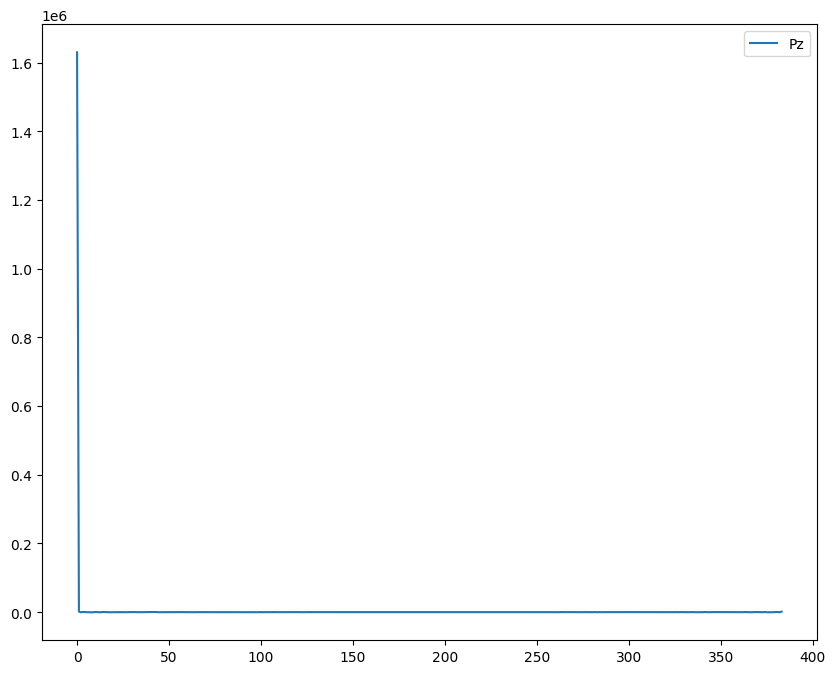

In [102]:
for i in range(len(eeg_each_channel)):
    expression = f'{channel_names[i]}'
    actual_fft = to_fft(eeg_each_channel, i)
    plt.figure(figsize=(10, 8))
    plt.plot([i for i in range(eeg_each_channel[i].shape[0])], actual_fft, label=f'{expression}')
    plt.legend()
    plt.show()

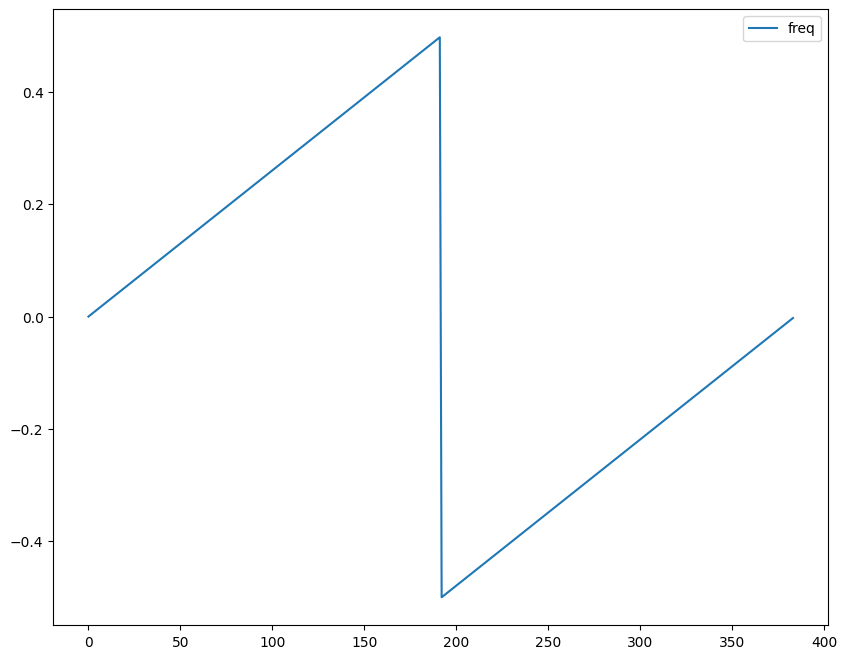

In [105]:
N = eeg_each_channel[0].size
af3 = eeg_each_channel[0]
timestep = 10
freq = fftfreq(N)

plt.figure(figsize=(10, 8))
plt.plot([i for i in range(af3.shape[0])], freq, label='freq')
plt.legend()
plt.show()